In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('sales_data python.csv')
print(df.head())

         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


In [14]:
df.shape

(110, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        110 non-null    object 
 1   Store       110 non-null    int64  
 2   Category    110 non-null    object 
 3   Units_Sold  110 non-null    int64  
 4   Unit_Price  110 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.4+ KB


In [16]:
df.describe()

,Store,Units_Sold,Unit_Price
count,110.000000,110.000000,110.000000
mean,102.018182,35.309091,121.444545
std,0.823751,12.986758,125.711453
min,101.000000,15.000000,19.990000
25%,101.000000,25.250000,19.990000
50%,102.000000,32.000000,49.990000
75%,103.000000,44.250000,299.990000
max,103.000000,62.000000,299.990000


In [17]:
df.columns.to_list()

['Date', 'Store', 'Category', 'Units_Sold', 'Unit_Price']

In [18]:
df.isnull().sum()

Date          0
Store         0
Category      0
Units_Sold    0
Unit_Price    0
dtype: int64

In [19]:
#valores duplicados
df.nunique()

Date          19
Store          3
Category       3
Units_Sold    24
Unit_Price     3
dtype: int64

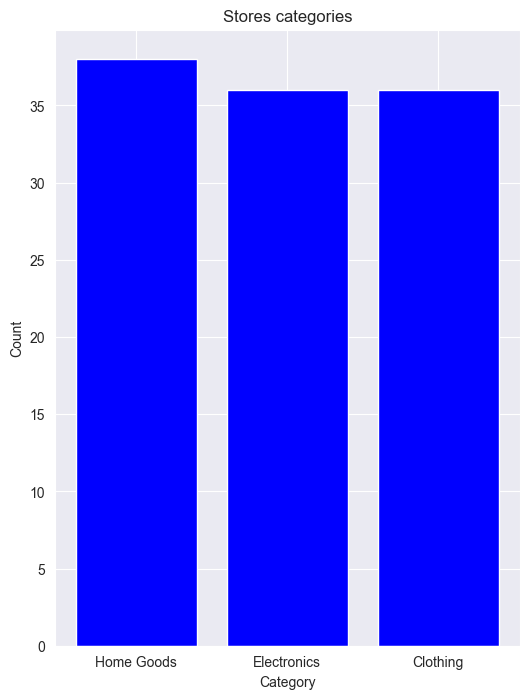

In [20]:
#plot the categories

categories_counts = df['Category'].value_counts()

plt.figure(figsize=(6,8))
plt.bar(categories_counts.index, categories_counts,color='b')
plt.title("Stores categories")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

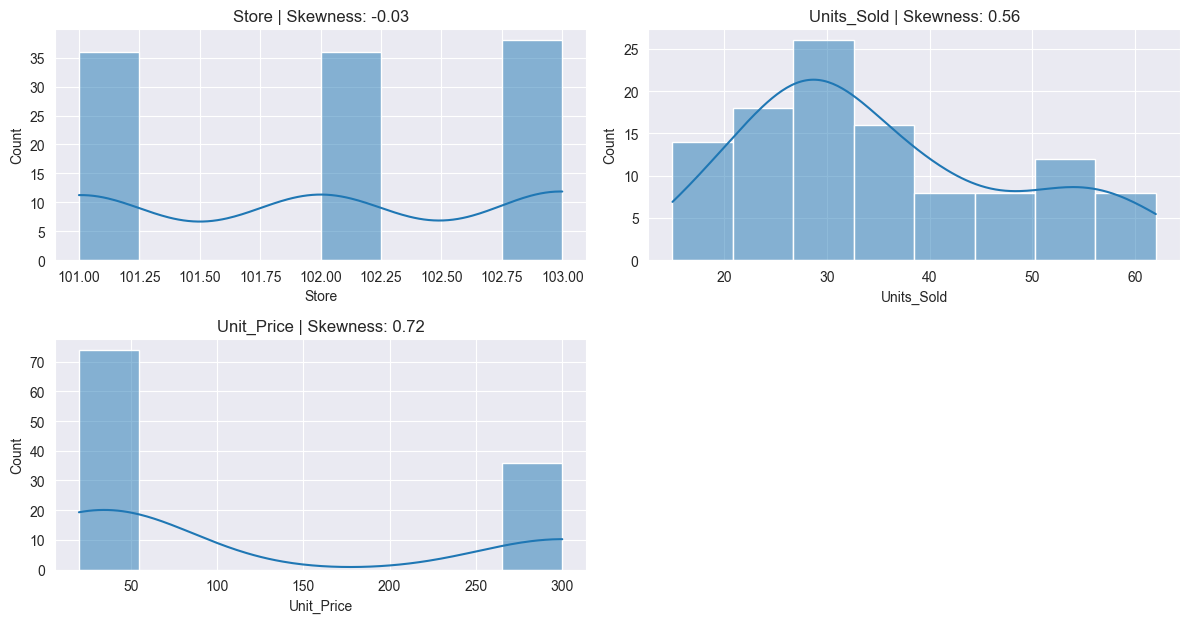

In [23]:
#kernel de densidad para comprender la varianza en el dataset
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8236\1470865050.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Categories')


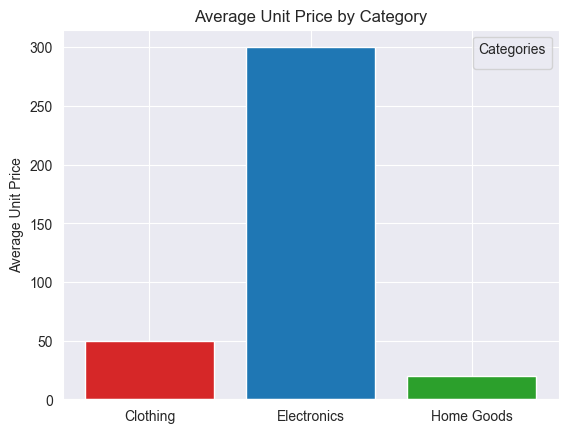

In [29]:
categories = df['Category'].value_counts()
data = df.groupby('Category')['Unit_Price'].mean()
fig, ax = plt.subplots()
bar_labels = data.index
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(bar_labels, data, color=bar_colors)

ax.set_ylabel('Average Unit Price')
ax.set_title('Average Unit Price by Category')
ax.legend(title='Categories')

plt.show()

           Date  Store     Category  Units_Sold  Unit_Price
0    2024-01-01    101  Electronics          30      299.99
1    2024-01-01    102     Clothing          45       49.99
2    2024-01-01    103   Home Goods          20       19.99
3    2024-01-02    101  Electronics          25      299.99
4    2024-01-02    102     Clothing          50       49.99
..          ...    ...          ...         ...         ...
105  2024-01-29    102     Clothing          62       49.99
106  2024-01-29    103   Home Goods          28       19.99
107  2024-01-20    101  Electronics          31      299.99
108  2024-01-20    102     Clothing          55       49.99
109  2024-01-20    103   Home Goods          26       19.99

[110 rows x 5 columns]


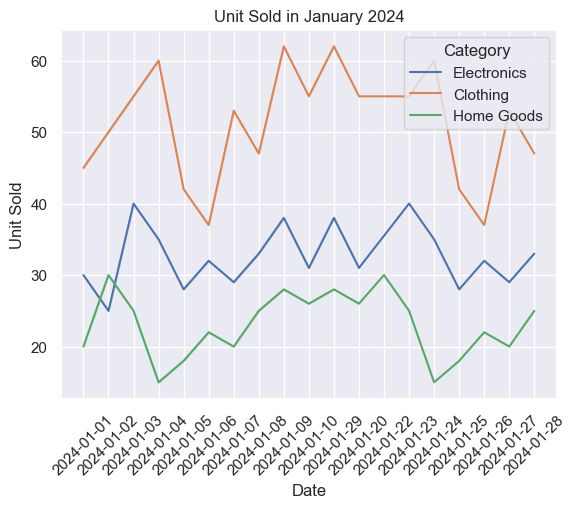

In [ ]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='Date', y='Units_Sold', hue='Category', data=df)
plt.title('Unit Sold in January 2024')
plt.xlabel('Date')
plt.ylabel('Unit Sold')
plt.xticks(rotation=45)
plt.show()